# MotifGopherTests

This notebook should be regarded as scratch work, to be used for debugging, testing, and documenting the development process. It is not intended to be polished.

In [1]:
import os
import random
import pickle
import matplotlib.pyplot as plt
import numpy as np

from MotifGopher.MotifGopher import MotifGopher

N = 5000000000

with open(os.path.join('..', 'datasets', 'occ_45K_train.pickle'), 'rb') \
        as dbfile:
    texts = list(pickle.load(dbfile).raw)
    if N < len(texts):
        texts = random.sample(texts, N)

## Tinkering With Hunting Parameters

### Tinkering with THRESH

In [2]:
gopher0 = MotifGopher(
    texts,
    thresh=0.1,
    confidence=0.99,
    r=0.75,
    saveto='MotifGopher'
)

lar to "OI: 10."
Hang in there. 30.00% finished after 1317.06 seconds. 7500 motifs checked and 633 motifs found.
DEBUG: "7, " too similar to "7,"
Hang in there. 30.40% finished after 1327.95 seconds. 7600 motifs checked and 635 motifs found.
DEBUG: "rma" too similar to "rm"
Hang in there. 30.80% finished after 1343.20 seconds. 7700 motifs checked and 637 motifs found.
DEBUG: "ty " too similar to "ty"
DEBUG: "s, " too similar to "s,"
Hang in there. 31.20% finished after 1364.10 seconds. 7800 motifs checked and 642 motifs found.
DEBUG: "9, " too similar to "9,"
Hang in there. 31.60% finished after 1381.16 seconds. 7900 motifs checked and 648 motifs found.
DEBUG: "ment" too similar to "men"
DEBUG: "on, " too similar to "on,"
Hang in there. 32.00% finished after 1398.80 seconds. 8000 motifs checked and 652 motifs found.
DEBUG: "r," too similar to "r, "
DEBUG: "M," too similar to "M, "
Hang in there. 32.40% finished after 1410.06 seconds. 8100 motifs checked and 655 motifs found.
DEBUG: "e 

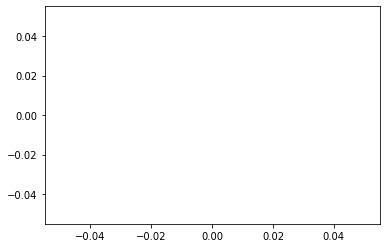

In [3]:
gopher0.plot_hunt(100000)

In [8]:
random.choices(list(gopher0._rejected_motifs), k=20)

['te thyr',
 '20\n',
 'differentiation in t',
 'za va',
 '1000301 PMI',
 '. N',
 '1016/j.y',
 'forma',
 '1152/aj',
 'nes. Cur',
 'herap',
 'Pr',
 '. Ins.',
 'h h',
 't, H',
 'ange distale',
 'laji',
 '294\n',
 'chnol',
 ': 4059394\n']

In [115]:
random.sample(list(gopher0.found_motifs), k=10)

['0, ', 'am', '45', 'o ', 'ial', 'ap', 'en ', ' doi:', '80', 'mm']

In [116]:
len(gopher0._rejected_motifs)

12777

In [117]:
gopher0.save()

In [119]:
gopher0.log("Saved at 17:07 PM, March 19.")

It is apparent that the number of found substrings does not level off quickly, even after approaching 2000. Feature selection with much more features than this (or more likely, about five times that many, as there is not a bijection between motifs and features) could get difficult.

That said, I may well change my mind after I impose the orthogonality requirement. Many of the found substrings may turn out to provide very similar information to each other.

In [29]:
gopher1 = MotifGopher(
    texts,
    thresh=0.1,
    confidence=0.99,
    r=0.75
)

Hang in there. 0.0% finished.
Hang in there. 0.1% finished.
Hang in there. 0.2% finished.
Hang in there. 0.3% finished.
Hang in there. 0.4% finished.
Hang in there. 0.5% finished.
Hang in there. 0.6% finished.
Hang in there. 0.7% finished.
Hang in there. 0.8% finished.
Hang in there. 0.9% finished.


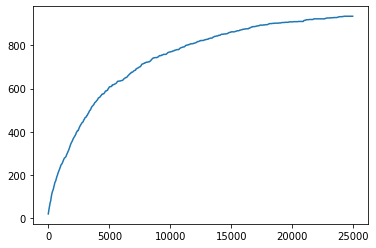

In [30]:
plot_hunt(gopher1)

I consider this to be much more manageable. If I greatly increase the number of hunts (maybe by an order of magnitude or so) and maybe increase the confidence level, I think I should get pretty good coverage of the common substrings.

### Tinkering with R

Hopefully, behavior of the Gopher should not change appreciably depending on R; instead, the most common motifs should be discovered regardless of R, as long as R is in some "reasonable" intermediate range. Let's start by seeing the extent to which that is true.

Hang in there. 0.0% finished.
Hang in there. 0.1% finished.
Hang in there. 0.2% finished.
Hang in there. 0.3% finished.
Hang in there. 0.4% finished.
Hang in there. 0.5% finished.
Hang in there. 0.6% finished.
Hang in there. 0.7% finished.
Hang in there. 0.8% finished.
Hang in there. 0.9% finished.


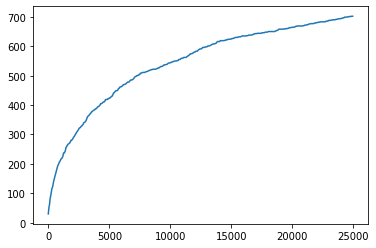

In [31]:
gopher2 = MotifGopher(
    texts,
    thresh=0.1,
    max_corr=0.9,
    confidence=0.99,
    r=0.25
)
plot_hunt(gopher2)

Already I am rather suspicious of a difference, but I think I know why the gopher with the lower thresh behaves in this way. It guesses a lot of repeated motifs because the motifs being generated are generally only a few characters long. In the rare times when it does generate a longer motif, it is tends to keep it. Therefore more hunts are needed before the curve will flatten.

Hang in there. 0.0% finished.
Hang in there. 0.1% finished.
Hang in there. 0.2% finished.
Hang in there. 0.3% finished.
Hang in there. 0.4% finished.
Hang in there. 0.5% finished.
Hang in there. 0.6% finished.
Hang in there. 0.7% finished.
Hang in there. 0.8% finished.
Hang in there. 0.9% finished.


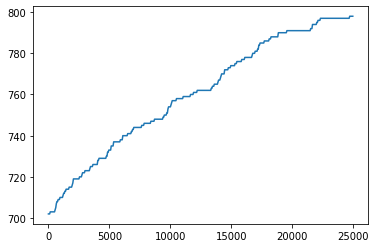

In [32]:
plot_hunt(gopher2)

(sigh) It is not flattening out.

Hang in there. 0.0% finished.
Hang in there. 0.1% finished.
Hang in there. 0.2% finished.
Hang in there. 0.3% finished.
Hang in there. 0.4% finished.
Hang in there. 0.5% finished.
Hang in there. 0.6% finished.
Hang in there. 0.7% finished.
Hang in there. 0.8% finished.
Hang in there. 0.9% finished.
Hang in there. 0.0% finished.
Hang in there. 0.1% finished.
Hang in there. 0.2% finished.
Hang in there. 0.3% finished.
Hang in there. 0.4% finished.
Hang in there. 0.5% finished.
Hang in there. 0.6% finished.
Hang in there. 0.7% finished.
Hang in there. 0.8% finished.
Hang in there. 0.9% finished.
Hang in there. 0.0% finished.
Hang in there. 0.1% finished.
Hang in there. 0.2% finished.
Hang in there. 0.3% finished.
Hang in there. 0.4% finished.
Hang in there. 0.5% finished.
Hang in there. 0.6% finished.
Hang in there. 0.7% finished.
Hang in there. 0.8% finished.
Hang in there. 0.9% finished.
Hang in there. 0.0% finished.
Hang in there. 0.1% finished.
Hang in there. 0.2% finished.
Hang in th

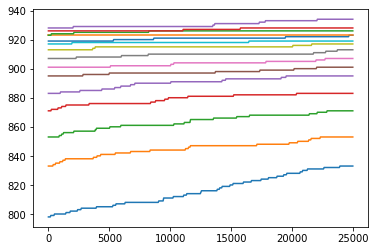

In [33]:
for _ in range(15):
    plot_hunt(gopher2)

Phew! It took a while, but it looks like the curve did flatten out in the 900's, which is similar to the number of motifs found by gopher1.

In [41]:
print('{:.6f}% of the motifs found by gopher1 were not found by\n'
      'gopher2, and\n'
      '{:.6f}% of the motifs found by gopher2 were not found by\n'
      'gopher1.'.format(
          np.mean([
              key not in gopher2.found_motifs
              for key in gopher1.found_motifs
          ])*100,
          np.mean([
              key not in gopher1.found_motifs
              for key in gopher2.found_motifs
          ])*100
      ))

5.781585% of the motifs found by gopher1 were not found by
gopher2, and
5.781585% of the motifs found by gopher2 were not found by
gopher1.


Hm. That's interesting, they each excluded exactly the same number of motifs that the other included. It seems like a bug, but I reread the code and I think it is actually just a coincidence.

In [44]:
g1_unique = [
    key for key in gopher1.found_motifs
    if key not in gopher2.found_motifs
    ]
g1_unique

['DOI: 10',
 'OI: 10',
 'doi:',
 ' the ',
 '10.10',
 ' doi: ',
 ' PMID: 1',
 ', DOI: 10.',
 ' DOI: 10.1',
 ' PMID:',
 '.1016/',
 '. PMID:',
 'MID: 2',
 ', DOI',
 '. PMID',
 'tic ',
 ', DOI: ',
 ' PMID: ',
 ' with ',
 ' DOI: 10.',
 'tion o',
 'on of ',
 ' Pr',
 'DOI: 10.',
 'DOI: 1',
 ' DOI: ',
 'OI: 10.10',
 'PMID: 2',
 '.1016',
 'DOI: 10.1',
 '. PMI',
 ', DOI:',
 'I: 10.1',
 'tion of',
 '. PMID: ',
 ': 10.1016',
 '10.101',
 's in ',
 'ation',
 ', PMID: ',
 ', DOI: 10',
 '0.1016',
 ' of t',
 'ical ',
 ' DOI: 10',
 ' PMID: 2',
 ': 10.10',
 'S. ',
 ' 10.101',
 ' 10.1016',
 'doi: ',
 ', DOI: 1',
 ', PMID:',
 ', PMID: 1']

In [45]:
g2_unique = [
    key for key in gopher2.found_motifs
    if key not in gopher1.found_motifs
    ]
g2_unique

['ib',
 'n i',
 '34',
 '76',
 '\nS',
 'lar',
 ' Sc',
 '74',
 'en ',
 ' Ca',
 '5, ',
 '83',
 'ste',
 'fr',
 'pat',
 'nts',
 'on,',
 'cat',
 'tur',
 'with',
 'R,',
 'enc',
 ' ce',
 'pu',
 ' Me',
 'tive',
 's an',
 'cha',
 'ive ',
 ' J, ',
 'qu',
 'P, ',
 'n of',
 't a',
 's of ',
 'OI: 10.1',
 '8\n',
 'tie',
 'q',
 'rac',
 ' A, ',
 'e t',
 'hu',
 'Ha',
 'OI: 10.',
 '69',
 '. 201',
 'ana',
 ' 22',
 'ance',
 '57',
 'sit',
 '1.',
 'A ']

In [46]:
len(g1_unique) == len(g2_unique)

True

Yep. Coincidence.

What have I learned? I have learned that choice of R values isn't likely to have a very big effect on what the final output of motifs looks like. Whether R is 0.75 or 0.25, the difference will be only about 5% -- and **probably much less if I am patient enough to increase the number of hunts by (say) ten.** That's a relief -- it reduces complexity of the final analysis.